In [18]:
from ucimlrepo import fetch_ucirepo   
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)   
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets

In [19]:
# metadata 
print(optical_recognition_of_handwritten_digits.metadata)

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

In [20]:
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [21]:
#Build a CNN from scratch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = X.values.reshape(-1,8,8,1)
y = y.values


In [22]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [23]:
# Modify the model architecture by adjusting the pooling parameters
model = keras.Sequential(
    [
        keras.Input(shape=(8, 8, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),  # Adjust the pooling parameters
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(1, 1)),  # Adjust the pooling parameters
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [24]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:

#Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5849 - loss: 1.3108 - val_accuracy: 0.9708 - val_loss: 0.1258
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2171 - val_accuracy: 0.9788 - val_loss: 0.0833
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.1670 - val_accuracy: 0.9827 - val_loss: 0.0504
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9778 - loss: 0.0782 - val_accuracy: 0.9814 - val_loss: 0.0578
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9774 - loss: 0.0652 - val_accuracy: 0.9907 - val_loss: 0.0307
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9832 - loss: 0.0511 - val_accuracy: 0.9920 - val_loss: 0.0303
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9899 - loss: 0.0409 - val_accuracy: 0.9934 - val_loss: 0.0245
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9898 - loss: 0.0307 - val_accuracy: 0.9947 - val_loss:

In [26]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0444
Test accuracy: 0.9838274717330933


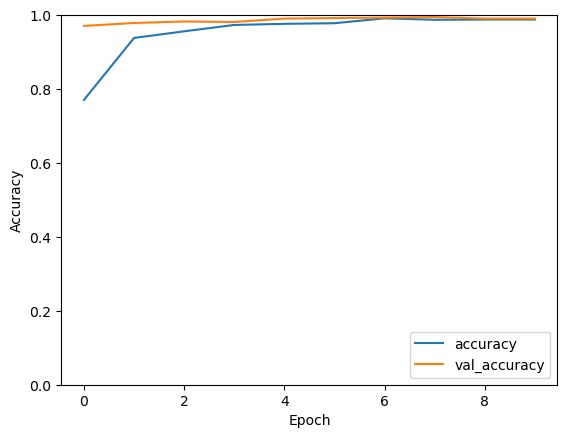

In [27]:
#Plot the accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

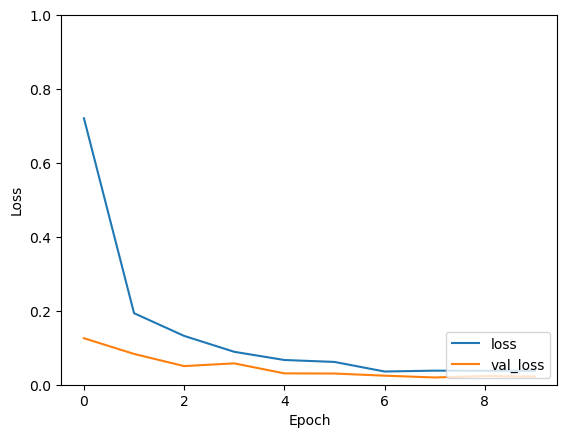

In [28]:
#Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')  
plt.show()

In [29]:
#Make predictions
predictions = model.predict(X_test)
print(predictions)
print(np.argmax(predictions[0]))
print(y_test[0])

#Plot the first 10 test images, their predicted label, and the true label
fig = plt.figure(figsize=(10, 10))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[8.9192637e-10 3.3886607e-09 6.2732546e-08 ... 9.9999940e-01
  1.0326286e-08 1.1420430e-09]
 [9.9999464e-01 1.4020322e-09 7.3840972e-08 ... 1.2986887e-07
  1.7820821e-07 1.1663863e-07]
 [9.4869258e-11 7.4588904e-09 7.8237966e-10 ... 1.5928122e-04
  4.0152315e-08 4.5564161e-07]
 ...
 [9.9999535e-01 1.4020538e-10 3.3855058e-06 ... 4.8100073e-08
  2.5598091e-08 2.8597070e-08]
 [2.1721189e-11 1.7075206e-09 1.6349808e-09 ... 2.4392693e-07
  7.1443790e-10 3.1334164e-07]
 [2.2155177e-06 1.2883805e-08 7.4163538e-08 ... 3.3740076e-08
  9.9938488e-01 5.5228913e-04]]
7
[7]


<Figure size 1000x1000 with 0 Axes>

In [30]:
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>